In [144]:
# Amr Yasser Anwar
# 202301043

#<h1><center>Some instructions</center></h1>

1 : Take A Copy From This Notebook .

2 : Make The Notebook Name as YOURNAME - YOURID.

3 : Complete the lab exercises in your Colab file.

4 : When you are finished, submit the exact Colab file.

    Do not submit any other file to the lab submission. Only the Colab file


# Load Libraries

In [97]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Data
## This Data -> https://drive.google.com/file/d/1TkAkK4Y1kpoyNwVub8uy-BOm1-OAgaaG/view?usp=drive_link

In [98]:
path = '/content/Dataset.csv'
data = pd.read_csv(path)
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Data Cleaning


## Quick View for the the data

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling missing values

In [102]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [103]:
data['Age'].fillna(data['Age'].median(), inplace=True)

<ipython-input-103-ca72a6c8cabd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [105]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-105-e67f7aa8e8b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [107]:
missing_values_after_handling = data.isnull().sum()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Removing duplicates

In [108]:
data.drop_duplicates(inplace=True)

In [111]:
duplicates_after_removal = data.duplicated().sum()
missing_values_after_handling, duplicates_after_removal

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 0)

## Converting data types

In [130]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [131]:
data['Age'] = data['Age'].astype(int)
print("\nConverted:")
print(data.dtypes)


Converted:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


## Check for outliers

In [132]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_Fare = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]
print("Outliers in Fare column:")
outliers_Fare.head()

Outliers in Fare column:


,Age,Booking,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,Siblings,Survived
1,38,PC 17599,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1
27,19,19950,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0
31,28,PC 17569,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1
34,28,PC 17604,C,82.1708,"Meyer, Mr. Edgar Joseph",0,35,1,male,1,0
52,49,PC 17572,C,76.7292,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,53,1,female,1,1


##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.)

In [114]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


# Data Preprocessing


## Handle outliers

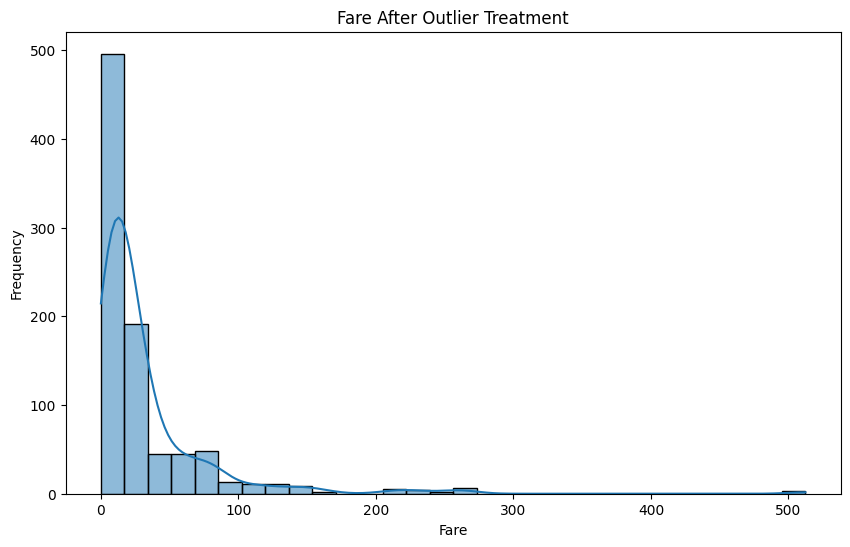

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title('Fare After Outlier Treatment')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

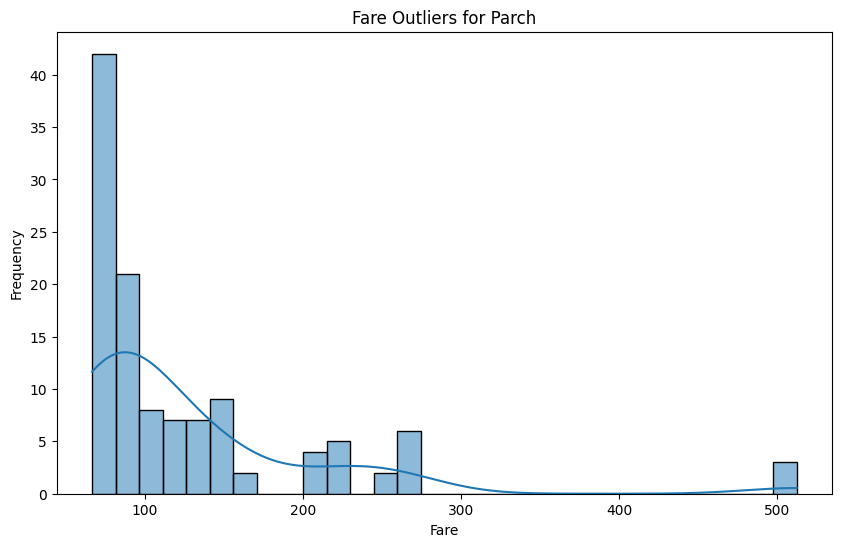

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(outliers_Fare['Fare'], bins=30, kde=True)
plt.title('Fare Outliers for Parch')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

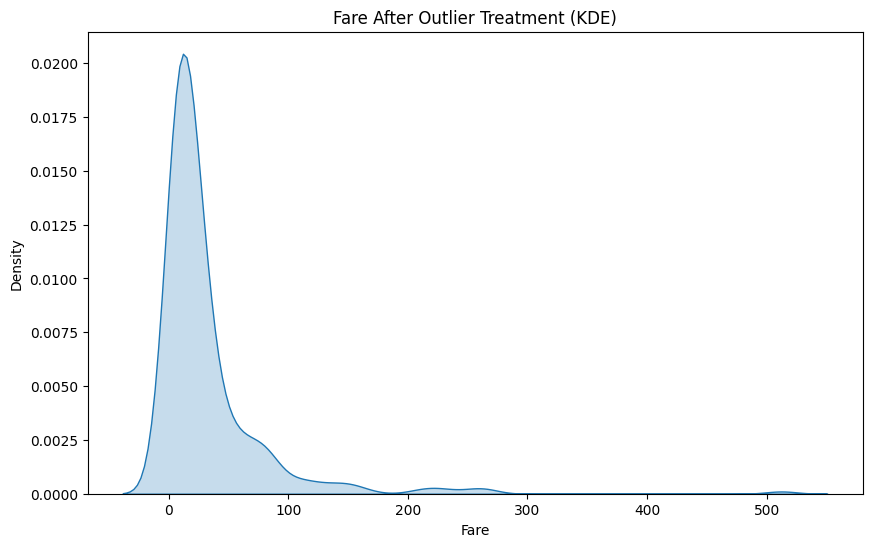

In [137]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Fare'], fill=True)
plt.title('Fare After Outlier Treatment (KDE)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

## Renaming columns

In [139]:
data.rename(columns={"Ticket": "Booking", "PassengerName": "PassName", "SibSp": "Siblings"}, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings,Parch,Booking,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


## Changing column order

In [140]:
data = data.reindex(sorted(data.columns), axis=1)
data.head()

,Age,Booking,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,Siblings,Survived
0,22,A/5 21171,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0
1,38,PC 17599,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1
2,26,STON/O2. 3101282,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1
3,35,113803,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1
4,35,373450,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0


## Dropping unnecessary columns

In [141]:
df_dropped = data.drop('PassengerId', axis=1)
df_dropped.head()

,Age,Booking,Embarked,Fare,Name,Parch,Pclass,Sex,Siblings,Survived
0,22,A/5 21171,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0
1,38,PC 17599,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1
2,26,STON/O2. 3101282,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1
3,35,113803,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1
4,35,373450,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0


# Data Visualization


##Histograms
get a visual representation of the distribution of a numeric variable.

1: Age

2: Fare

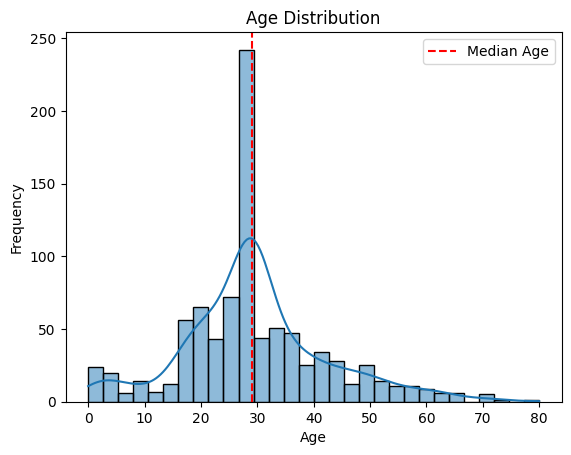

In [127]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.axvline(data['Age'].median(), color='red', linestyle='--', label='Median Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

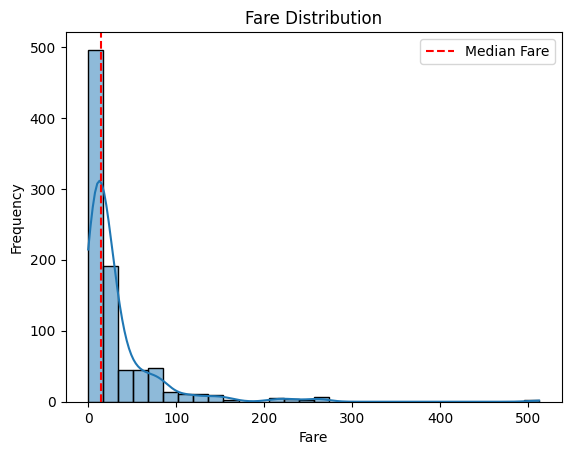

In [126]:
sns.histplot(data['Fare'], bins=30, kde=True)
plt.axvline(data['Fare'].median(), color='red', linestyle='--', label='Median Fare')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Box plots
visualize the distribution through quartiles, extremes, and outliers for a numeric variable.

1: Age

2: Fare

3: SibSp

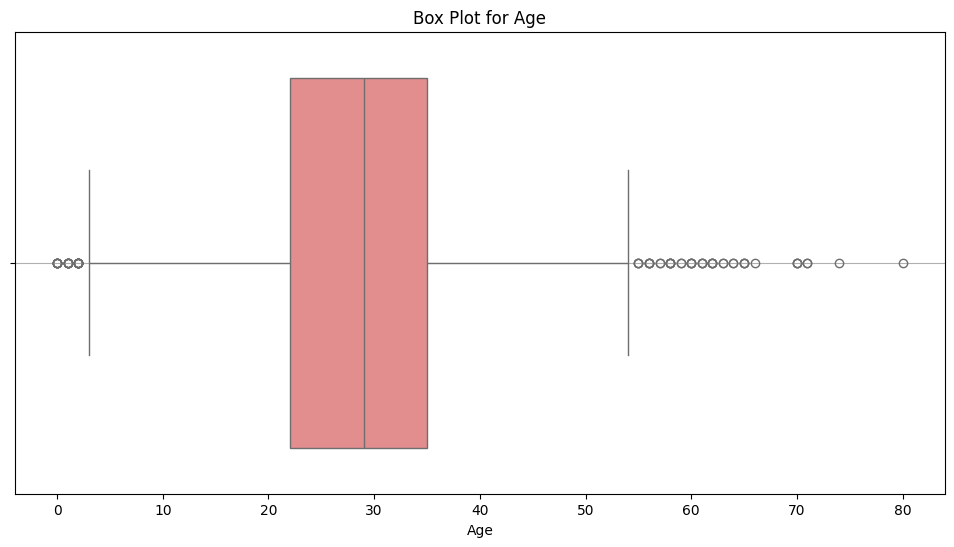

In [125]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Age'], color='lightcoral')
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.grid(axis='y')
plt.show()

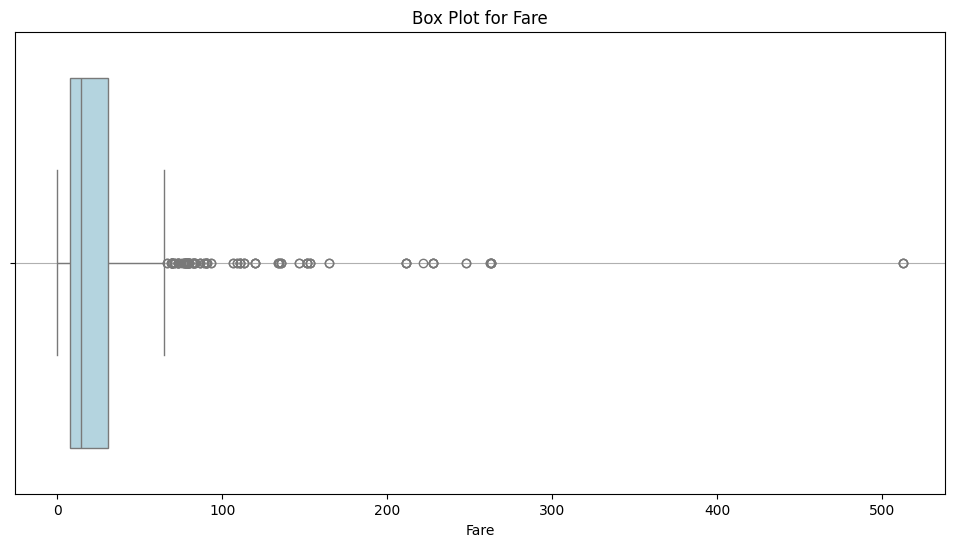

In [124]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Fare'], color='lightblue')
plt.title('Box Plot for Fare')
plt.xlabel('Fare')
plt.grid(axis='y')
plt.show()

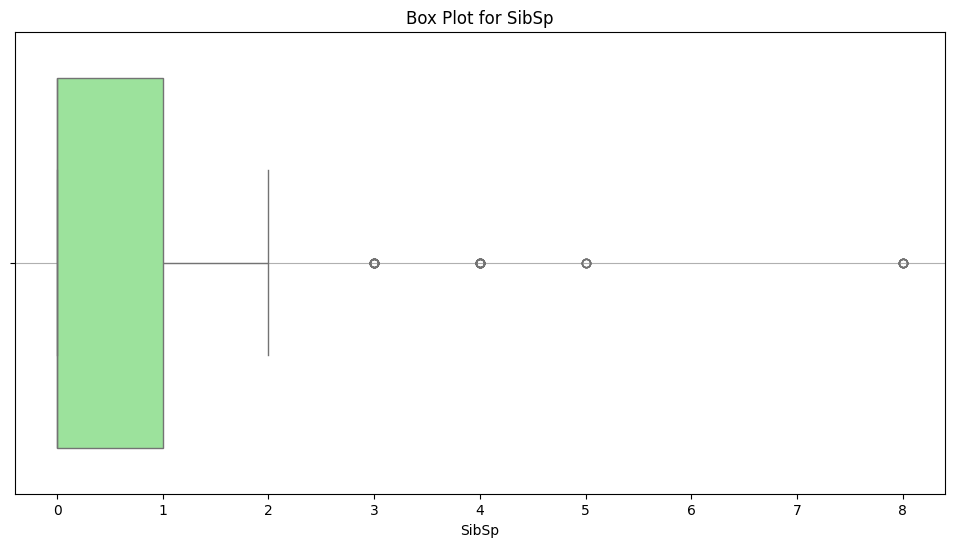

In [123]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Siblings'], color='lightgreen')
plt.title('Box Plot for SibSp')
plt.xlabel('SibSp')
plt.grid(axis='y')
plt.show()

## pie plots
1 : Embarked

2 : Sex

3 : Survived

4 : PassengerClass

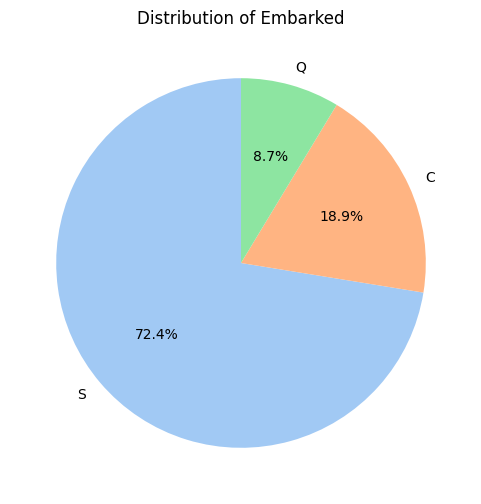

In [122]:
plt.figure(figsize=(6, 6))
data['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Embarked')
plt.ylabel('')
plt.show()

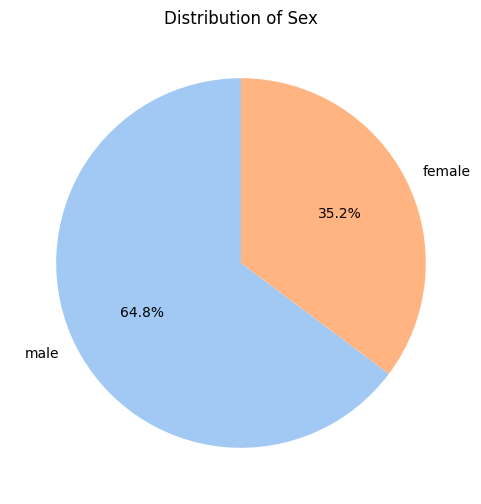

In [121]:
plt.figure(figsize=(6, 6))
data['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

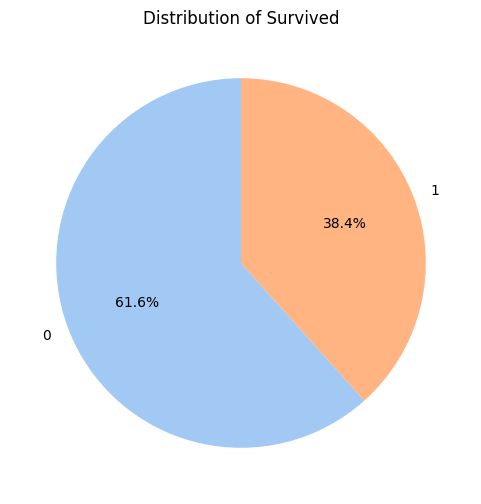

In [56]:
plt.figure(figsize=(6, 6))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Survived')
plt.ylabel('')
plt.show()

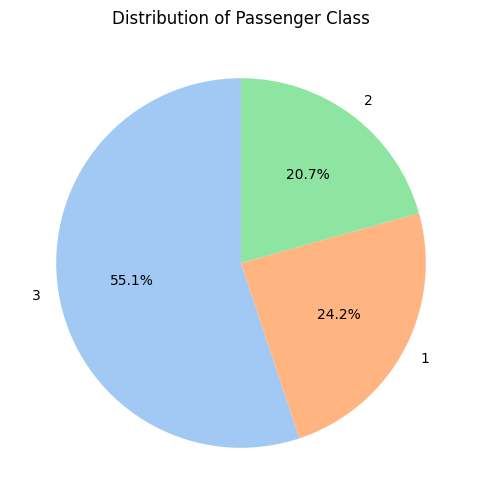

In [57]:
plt.figure(figsize=(6, 6))
data['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Passenger Class')
plt.ylabel('')
plt.show()

## Bar plots

1 : Bar plot for PassengerClass

2 : Bar plot for Embarked

3 : Bar plot for Sex

<ipython-input-115-c8a95af5abae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=clean_df, palette='viridis')


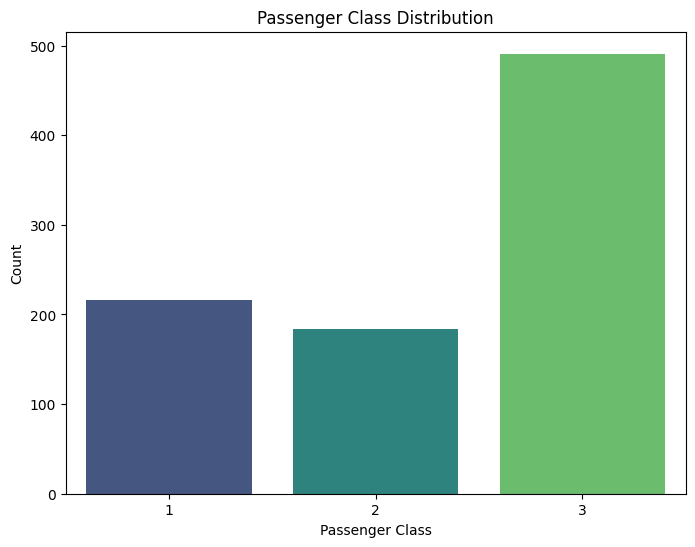

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='viridis')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<ipython-input-116-735a41208084>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=clean_df, palette='viridis')


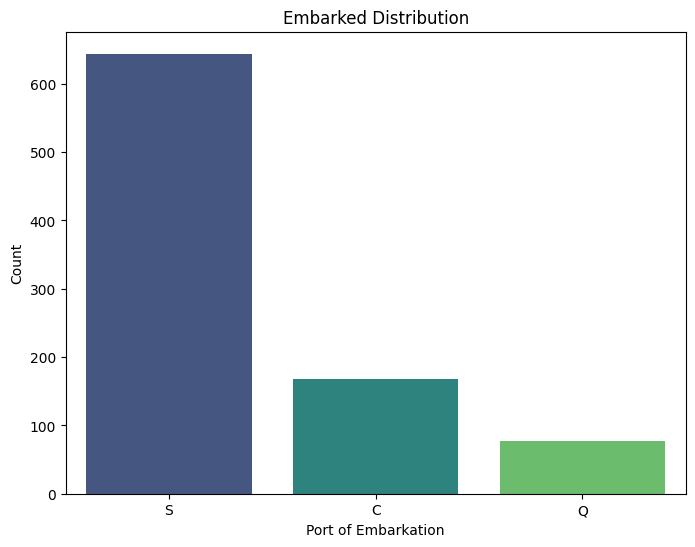

In [116]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=data, palette='viridis')
plt.title('Embarked Distribution')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

<ipython-input-117-a1599ac02678>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=clean_df, palette='viridis')


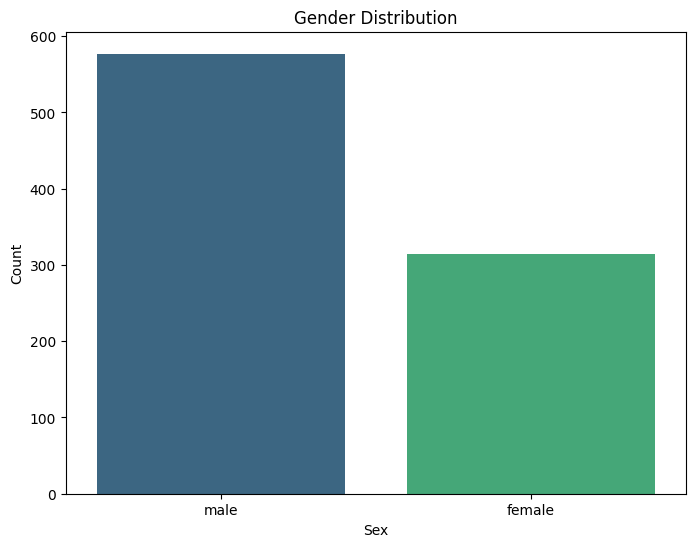

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

## Make pie plot for
1 : Survived column with female

2 : Survived column with male

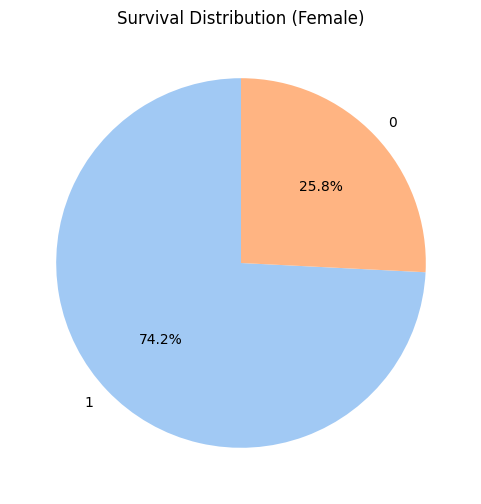

In [118]:
plt.figure(figsize=(6, 6))
data[data['Sex'] == 'female']['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Survival Distribution (Female)')
plt.ylabel('')
plt.show()

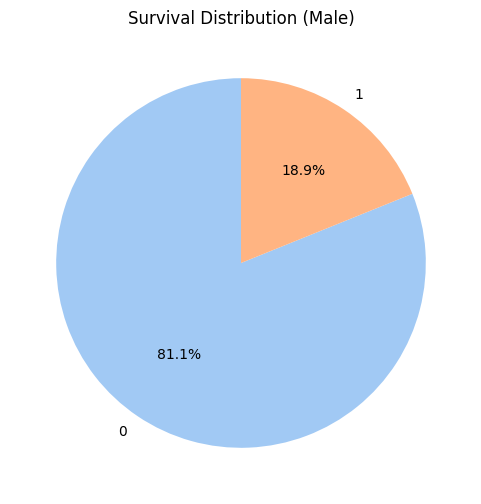

In [119]:
plt.figure(figsize=(6, 6))
data[data['Sex'] == 'male']['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Survival Distribution (Male)')
plt.ylabel('')
plt.show()

## Make Bar plot for sex with Survived

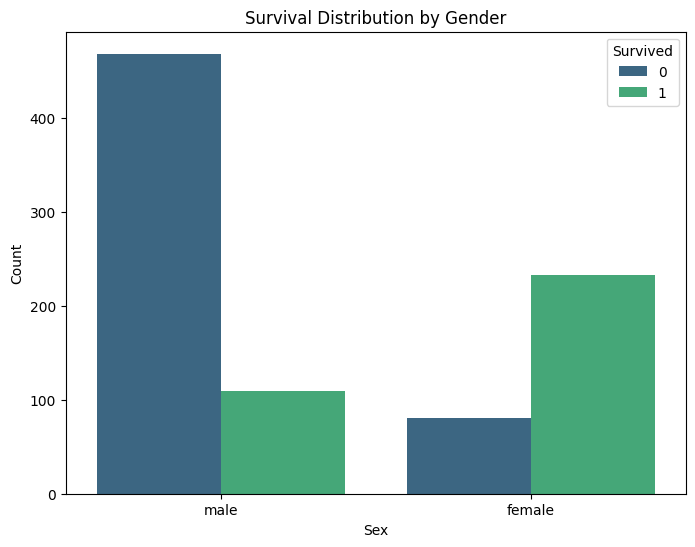

In [120]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette='viridis')
plt.title('Survival Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Thank you for your work. ✅